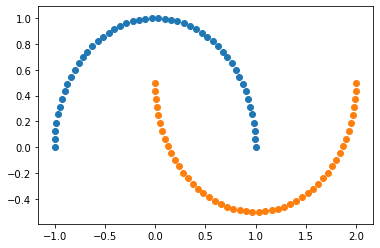

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

x, y = datasets.make_moons()
x.shape
# (100, 2)
y.shape
# (100,)
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

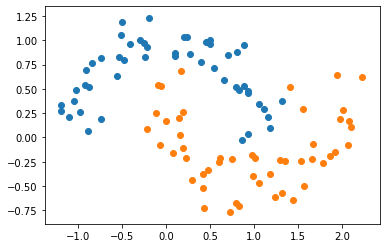

In [22]:
x1, y1 = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(x1[y1==0, 0], x1[y1==0, 1])
plt.scatter(x1[y1==1, 0], x1[y1==1, 1])
plt.show()

C:\Users\liaomin\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'linewidth'


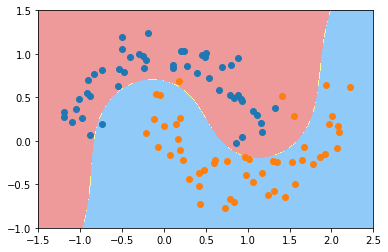

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomiaSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('linear_svc', LinearSVC(C=C))
    ])

poly_svc = PolynomiaSVC(degree=3)
poly_svc.fit(x, y)

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
                         np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),)
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x1[y1==0, 0], x1[y1==0, 1])
plt.scatter(x1[y1==1, 0], x1[y1==1, 1])
plt.show()

C:\Users\liaomin\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'linewidth'


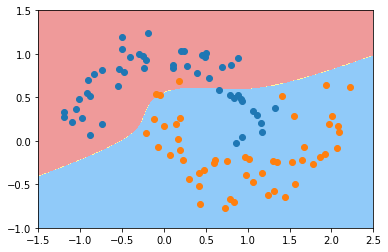

In [24]:
from sklearn.svm import SVC

# 这种方法训练的过程并不完全是先将数据进行标准化，再使用linearSVC这么一个过程
# SVC中默认的C=0
def PolynomiaKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scale', StandardScaler()),
        ('kernel_svc', SVC(kernel='poly', degree=degree, C=C))
    ])

poly_kernel_svc = PolynomiaKernelSVC(degree=3)
poly_kernel_svc.fit(x1, y1)
# Pipeline(memory=None,
#     steps=[('std_scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
#  ('kernel_svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#   kernel='poly', max_iter=-1, probability=False, random_state=None,
#   shrinking=True, tol=0.001, verbose=False))])

plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x1[y1==0, 0], x1[y1==0, 1])
plt.scatter(x1[y1==1, 0], x1[y1==1, 1])
plt.show()
